# Epeak-Eiso.ipynb for GW Counterparts (SGRBs)

In [1]:
import numpy as np
import h5py
from astropy.cosmology import LambdaCDM
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from tqdm import tqdm

with h5py.File('nsns_population_joan.hdf5', 'r') as table:
    z = table['z'][()]
    Epeak = np.log10(table['Epeak'][()])
    #Epeak_err = 0.1 * Epeak # 10% errors on Epeak
    linear_err = 0.1*table['Epeak'][()]
    Epeak_err = linear_err / (table['Epeak'][()] + np.log(10))

    original_Eiso = np.log10(table['Eiso'][()])

nan_mask1 = np.isnan(original_Eiso)
nan_mask2 = np.isnan(Epeak)
combined_nan_mask = nan_mask1 | nan_mask2

inf_mask1 = np.isinf(original_Eiso)
inf_mask2 = np.isinf(Epeak)
combined_inf_mask = inf_mask1 | inf_mask2

outliner_mask = [val<40 for val in original_Eiso]
for i, x in enumerate(outliner_mask):
    if x==True:
        print(i,x)

total_combined_mask = combined_nan_mask | combined_inf_mask | outliner_mask
inverse_mask = ~total_combined_mask

z = z[inverse_mask]
original_Eiso = original_Eiso[inverse_mask]
Epeak = Epeak[inverse_mask]
Epeak_err = Epeak_err[inverse_mask]

original_Eiso_bc = original_Eiso - np.mean(original_Eiso)
Epeak_bc = Epeak - np.mean(Epeak)

0 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
23 True
24 True
25 True
30 True
34 True
37 True
43 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
54 True
55 True
56 True
58 True
71 True
78 True
80 True
81 True
100 True
105 True
122 True
123 True
124 True
125 True
144 True
146 True
147 True
148 True
152 True
153 True
155 True
158 True
160 True
161 True
162 True
169 True
187 True
191 True
192 True
193 True
194 True
200 True
204 True
205 True
217 True
218 True
219 True
220 True
221 True
222 True
224 True
225 True
228 True
229 True
230 True
239 True
240 True
252 True
255 True
256 True
259 True
260 True
276 True
277 True
282 True
283 True
291 True
292 True
293 True
303 True
305 True
309 True
310 True
311 True
313 True
336 True
339 True
342 True
344 True
350 True
366 True
372 True
380 True
383 True
386 True
387 True
388 True
391 True
392 True
393 True
394 True
395 True
396 True
400 True
402 True
403 True
404 True
413 True
443 True
444 True
445 True
446 Tr

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_16866/1955925234.py:15: RuntimeWarning: divide by zero encountered in log10
  original_Eiso = np.log10(table['Eiso'][()])
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_16866/1955925234.py:15: RuntimeWarning: invalid value encountered in log10
  original_Eiso = np.log10(table['Eiso'][()])


<ErrorbarContainer object of 3 artists>

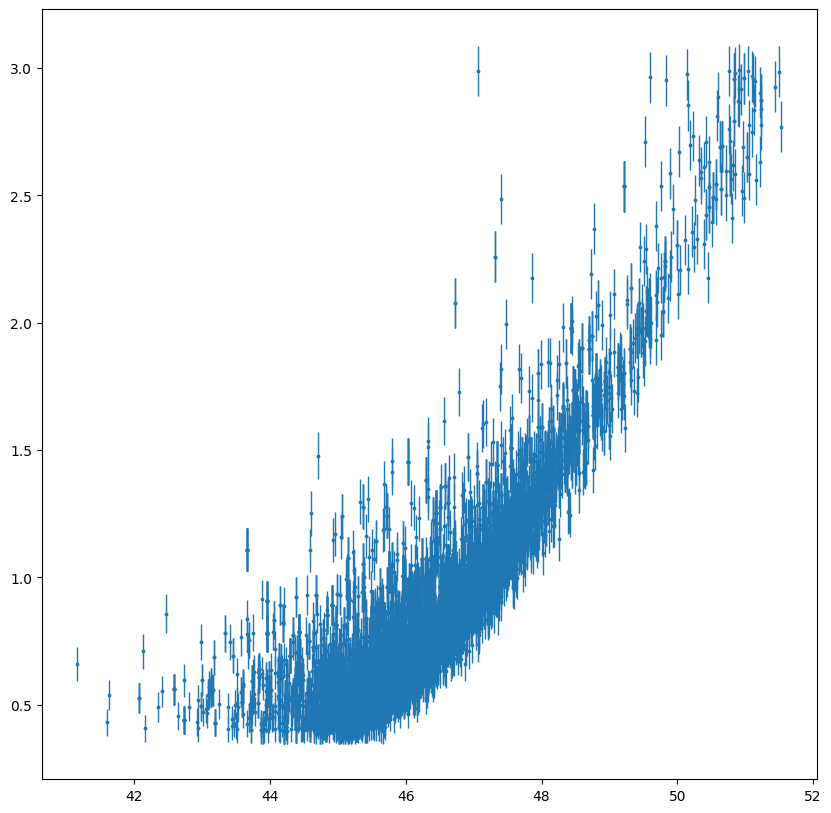

In [2]:
plt.figure(figsize=(10,10))
plt.scatter(original_Eiso, Epeak, s=3)
plt.errorbar(original_Eiso, Epeak, yerr=Epeak_err, fmt='none', elinewidth=1)

# Single Correlation

In [3]:
factor = 1
extra_err = np.log10(factor)
total_err = Epeak_err + extra_err
standard_cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
standard_dl = standard_cosmo.luminosity_distance(z).value

def model(x, p1, p2):
    return p1*x +p2

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
dl = cosmo.luminosity_distance(z).value


# print('z\tstddl\tdl\tEiso\tEiso_bc\tmean')
Eiso = 2*np.log10(dl/standard_dl) + original_Eiso
Eiso_bc = Eiso - np.mean(Eiso)
# for i in range(len(z[0:10])):
#     print(z[i],standard_dl[i], dl[i], original_Eiso[i], Eiso[i], Eiso_bc[i], np.mean(Eiso))

if np.isnan(Eiso_bc).any():
    print('WRONG; WRONG!')

popt, pcov = curve_fit(model, Eiso_bc, Epeak_bc, p0=[0.5, 0.0], bounds=([-10.0, -10.0], [10.0, 10.0])) #, sigma=total_err
a_fit, b_fit = popt
residuals = Epeak_bc - model(Eiso_bc, *popt)
dof = len(Eiso_bc)-2
chi_value = np.sum((residuals / total_err) ** 2)#/dof
print(a_fit, b_fit, chi_value)

0.2751044557814874 -4.993656712417365e-16 55254.01791797732


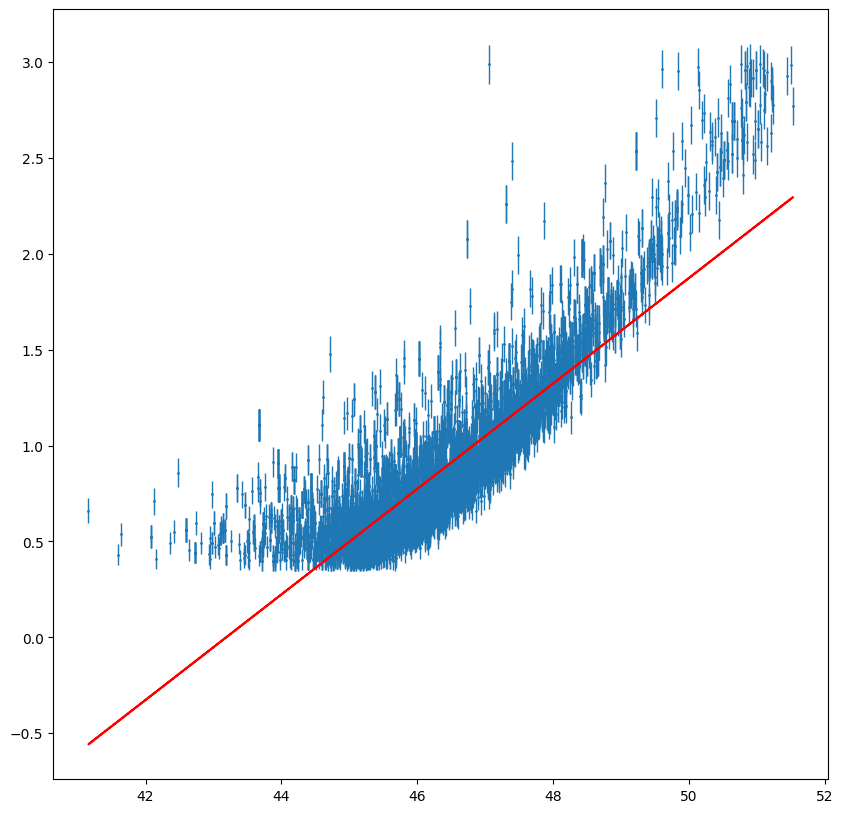

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(Eiso, Epeak, s=1)
plt.errorbar(Eiso, Epeak, yerr=Epeak_err, fmt='none', elinewidth=1)
plt.plot(Eiso, model(Eiso_bc, a_fit, b_fit+np.mean(Epeak)), c='r')

# Multiple Cosmologies

/Users/joanalnu/opt/anaconda3/envs/grbcosmo/lib/python3.13/site-packages/astropy/cosmology/_src/flrw/base.py:1179: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(self._inv_efunc_scalar, z1, z2, args=self._inv_efunc_scalar_args)[0]
/Users/joanalnu/opt/anaconda3/envs/grbcosmo/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2623: RuntimeWarning: invalid value encountered in _integral_comoving_distance_z1z2_scalar (vectorized)
  outputs = ufunc(*args, out=...)
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_16866/3051879496.py:23: RuntimeWarning: invalid value encountered in log10
  Eiso = 2*np.log10(dl/standard_dl) + original_Eiso
/Users/joanalnu/opt/anaconda3/envs/grbcosmo/lib/python3.13/site-packages/astropy/cosmology/_src/flrw/base.py:1179: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increas

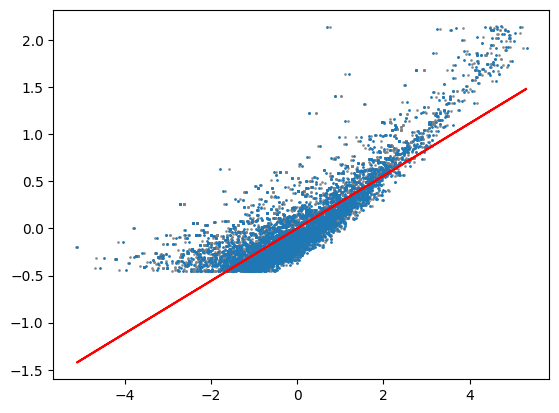

In [5]:
factor = 1
extra_err = np.log10(factor)
total_err = Epeak_err + extra_err
standard_cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
standard_dl = standard_cosmo.luminosity_distance(z).value

def model(x, p1, p2):
    return p1*x + p2

Om = np.linspace(0.0, 2.0, 25)
Ode = np.linspace(0.0, 2.0, 25)

chi_surface = np.zeros([len(Om), len(Ode)])
a = np.zeros([len(Om), len(Ode)])
b = np.zeros([len(Om), len(Ode)])
mask = np.zeros([len(Om), len(Ode)])

for i in range(len(Om)):
    for j in range(len(Ode)):
        cosmo = LambdaCDM(H0=70, Om0=Om[i], Ode0=Ode[j])
        dl = cosmo.luminosity_distance(z).value

        Eiso = 2*np.log10(dl/standard_dl) + original_Eiso
        Eiso_bc = Eiso - np.mean(Eiso)

        if np.isnan(Eiso_bc).any():
            chi_surface[i,j]=1e4
            mask[i,j]=True
            continue

        popt, pcov = curve_fit(model, Eiso_bc, Epeak_bc, p0=[0.5, 0.0], bounds=([-10.0, -10.0], [10.0, 10.0])) #, sigma=total_err
        a[i,j], b[i,j] = popt
        residuals = Epeak_bc - model(Eiso_bc, *popt)
        dof = len(Eiso_bc)-2
        chi_surface[i,j] = np.sum((residuals / total_err) ** 2)#/dof

        n1 = np.random.randint(0,625)
        if n1==234 or n1==356:
            plt.figure()
            plt.scatter(original_Eiso_bc, Epeak_bc, s=1, color='grey', alpha=0.8)
            plt.scatter(Eiso_bc, Epeak_bc, s=1)
            plt.plot(Eiso_bc, model(Eiso_bc, a[i,j], b[i,j]), c='r', label=f'fit: a={a[i,j]}, b={b[i,j]}, X={chi_surface[i,j]}')
            plt.show()
            plt.close()


In [6]:
masked_chi_surface = np.ma.array(chi_surface, mask=mask)

min_chi = np.min(masked_chi_surface)
i1, i2 = np.unravel_index(np.argmin(masked_chi_surface), masked_chi_surface.shape)
Om_fit, Ode_fit = Om[i1], Ode[i2]
print(Om_fit, Ode_fit, min_chi)

0.0 1.0833333333333333 53160.691927145526


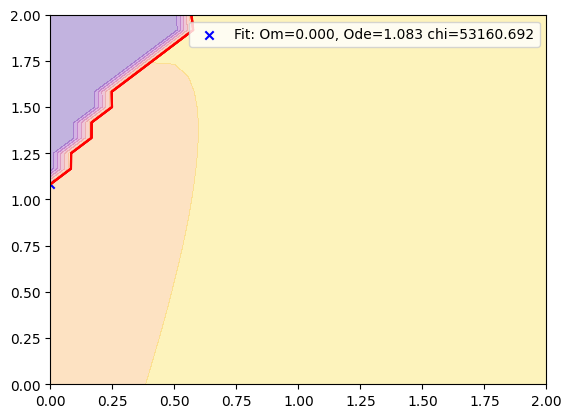

In [7]:
plt.figure()
plt.contourf(Om, Ode, chi_surface.T, cmap='plasma', alpha=0.3)
#plt.contourf(Om, Ode, masked_chi_surface.T, cmap='plasma', alpha=0.5)
plt.contour(Om, Ode, chi_surface.T, levels=[min_chi, min_chi+2.3, min_chi+4.61, min_chi+9.21], colors='red')
plt.scatter(Om_fit, Ode_fit, c='b', marker='x', label=f'Fit: Om={Om_fit:.3f}, Ode={Ode_fit:.3f} chi={min_chi:.3f}')
plt.legend()

In [8]:
np.save('SGRB_chi_surface.npy', chi_surface)
np.save('SGRB_mask.npy', mask)

Conclusions: fit is very weird, maybe because the data points don't align with a power-law? Should we change the method that we're using?